# German Traffic Sign Dataset

This is the first notebook of German Traffic dataset study. In this notebook, we will explore the dataset in detail and discuss potential solution. Also, I will train simple MLP just to check the output.

In [1]:
import keras
import pickle
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
%matplotlib inline

/Users/kathan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/kathan/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


# 1. Load Dataset

In [2]:
# Loading train and test dataset

with open('original_traffic_set/train.p',mode = 'rb') as f:
    train_data = pickle.load(f)
    
X_train,y_train = train_data['features'],train_data['labels']

with open('original_traffic_set/valid.p','rb') as ft:
    valid_data = pickle.load(ft)
    
X_valid,y_valid = valid_data['features'],valid_data['labels']

with open('original_traffic_set/test.p','rb') as ft:
    test_data = pickle.load(ft)
    
X_test,y_test = test_data['features'],test_data['labels']


# 2. Explore Dataset

In [3]:
print (X_train.shape,y_train.shape)
print (X_valid.shape,y_valid.shape)
print (X_test.shape,y_test.shape)

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)


In [4]:
number_classes = len(np.unique(y_train))
unique_train, counts_train = np.unique(y_train, return_counts=True)

print ("Number of classes: ", unique_train)
print ()
print ("Counts in each class: ", counts_train)

Number of classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

Counts in each class:  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


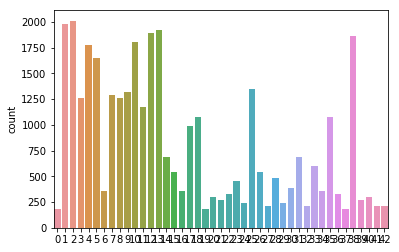

In [5]:
sns.countplot(y_train,label="Count")
plt.show()

## Observations
    1. Dataset has around ~35k train images with 43 classes
    2. From above figure, we can say that dataset is unbalanced with lowest class value 180 and highest 2010. We have to balance these data.
    

## Visulizing train images with labels

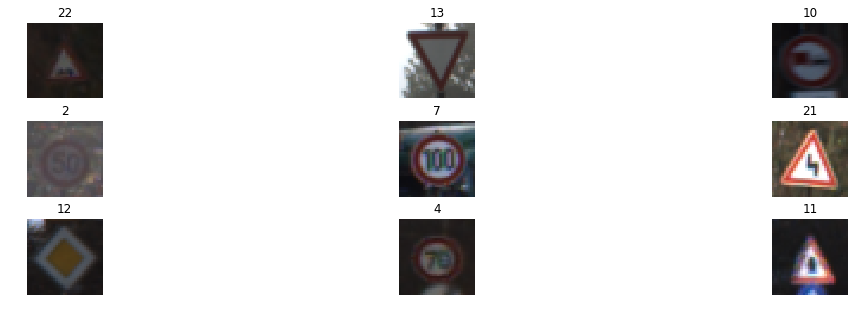

In [6]:
import random
fig,axs = plt.subplots(3,3,figsize=(20,5))
fig.subplots_adjust(hspace = .3,wspace=.005)
axs = axs.ravel()

for i in range(9):
    index = random.randint(0,len(X_train))
    img = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(img)
    axs[i].set_title(y_train[index])

# 3. Define Model

Here I have implemented three layer NN with 128 hidden layers in each of the hidden layers

![MLP](mlp.jpeg)

In [7]:
model = Sequential()

In [8]:
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))

In [9]:
#Preprocess Data
X_train_normal = X_train/255.0 - 0.5
X_valid_normal = X_valid/255.0 - 0.5

from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
y_train_one_hot = labelbinarizer.fit_transform(y_train)
y_valid_one_hot = labelbinarizer.fit_transform(y_valid)


In [10]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

history = model.fit(X_train_normal, y_train_one_hot, nb_epoch=20,validation_data=(X_valid_normal,y_valid_one_hot))

/Users/kathan/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 7s 190us/step - loss: 1.3977 - acc: 0.6056 - val_loss: 1.4671 - val_acc: 0.6270
Epoch 2/20
34799/34799 [==============================] - 6s 183us/step - loss: 0.6000 - acc: 0.8224 - val_loss: 1.0479 - val_acc: 0.7188
Epoch 3/20
34799/34799 [==============================] - 6s 174us/step - loss: 0.4659 - acc: 0.8608 - val_loss: 0.9886 - val_acc: 0.7315
Epoch 4/20
34799/34799 [==============================] - 6s 174us/step - loss: 0.4060 - acc: 0.8792 - val_loss: 1.0864 - val_acc: 0.7197
Epoch 5/20
34799/34799 [==============================] - 6s 179us/step - loss: 0.3447 - acc: 0.8956 - val_loss: 0.9030 - val_acc: 0.7764
Epoch 6/20
34799/34799 [==============================] - 6s 186us/step - loss: 0.3057 - acc: 0.9092 - val_loss: 1.1702 - val_acc: 0.7179
Epoch 7/20
34799/34799 [==============================] - 8s 231us/step - loss: 0.2886 - acc: 0.9126 - val_loss: 1.0402 - v

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])


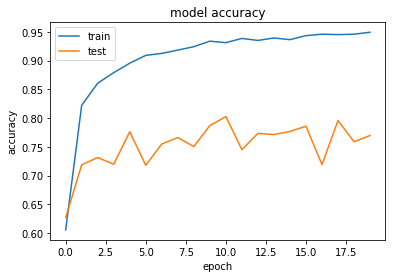

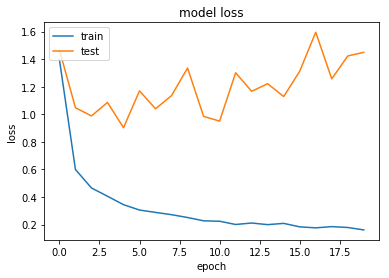

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:

y_test_one_hot = labelbinarizer.fit_transform(y_test)
X_test_normal = X_test/255.0 - 0.5
score, acc = model.evaluate(X_test_normal, y_test_one_hot,
                            batch_size=32)
print (X_test_normal.shape)
print (y_test.shape)
print('Test score:', score)
print('Test accuracy:', acc)

12630/12630 [==============================] - 1s 54us/step
(12630, 32, 32, 3)
(12630,)
Test score: 1.201831762510354
Test accuracy: 0.8098178939411589


# 4. Conclusion

I have tried to implement simple MLP without tuning hyper parameters much.

With the simplest network, we are able to get ~78-80% accuracy. 

We can observe that, Loss is not decreasing with epochs and validation accuracy is also fluctuating.

The model is overfitting. Here we have not used any regularization. We have not used any type of data augmentation or tuned any hyper parameters etc.

Also, MLP model is very basic for these type of dataset. In next notebook, we will use CNN.